In [3]:
import numpy as np
import sys
import os
import textwrap
from datetime import datetime as dt
import calendar
import texts as tx

In [6]:
import sys,time

string = """ H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping"""

typing_speed = 390

def slow_type(t):
    for l in t:
        sys.stdout.write(l)
        sys.stdout.flush()
        time.sleep(10.0/typing_speed)
    print('\n')

slow_type(string)

 H opefully
 A ll
 R espectful
 V isitors
 E njoy
 S ome
 T ipping



In [ ]:
STAFF = [
    'diego',
    'maike',
    'grogu',
    'sina',
    'taro',
    'grace',
    'anna bendel',
    'charlotte',
    'isabelle',
    'jessica',
    'anna',
    'juliana',
    'lea',
    'lino',
    'maja',
    'margaretha',
    'marilin',
    'matthias',
    'micaela',
    'mona',
    'anisa',
    'rieka',
    'sabina',
    'sandra',
    'santiago',
    'therese',
    'utz',
    'yunus',
    'veronica',
    'karolina',
    'imer'
]


def is_not_int(var):
    try:
        int(var)
        return False
    except:
        return True

def wich_one(name):
    hit =[]
    for s in STAFF:
        if name in s:
            hit.append(s)

    if len(hit) > 1:
        print('wich one?')
        for i, s in enumerate(hit):
            print(f'{i+1}. {s}')
            
        result = input('--> select: ')
        
        while is_not_int(result):
            result = input('--> select: ')

        return hit[int(result) - 1]

    else:
        return name


file_path = []

root_dir = './json/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        if not any(s in filename for s in ['LOG', 'checkpoint', 'DS', 'edited']):
            if 'WHOLE' in filename:
                filename = os.path.join(root, filename)
                if int(filename[7:11]) == 2024:
                    if int(filename[12:14]) >= 9:
                        file_path.append(filename)
                    elif int(filename[12:14]) == 8 and int(filename[15:17]) >= 17:
                        file_path.append(filename)
                elif int(filename[7:11]) >= 2025:
                    file_path.append(filename)


staff_tip = [[] for i in range(len(STAFF))]
staff_date = [[] for i in range(len(STAFF))]


for file in file_path:
    f = open(file)
    jData = json.loads(f.read())

    try:
        for i, staff in enumerate(jData['staff']):
            staff_tip[STAFF.index(staff)].append(jData['tip'][i])
            staff_date[STAFF.index(staff)].append(jData['timestamp'])

    except KeyError:
        print('skip file', file[7:])

for i, j in enumerate(staff_tip):
    print(staff_tip[i], staff_date[i])

In [ ]:
def sorterkey(line):
    year = line[7:11]
    month = line[12:14]
    day = line[15:17]
    
    return (int(year), int(month), int(day))

file_path = []

root_dir = './json/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        if not any(s in filename for s in ['LOG', 'checkpoint', 'DS', 'edited']):
            file_path.append(os.path.join(root, filename))

for file in sorted(file_path, key=sorterkey):
    f = open(file)
    jData = json.loads(f.read())

    m = 9
    d = 14

    day, month, year = jData['timestamp'].split('-', 1)[0].split('.')
    if int(year) == 2024 and int(month) >= m:
        if int(month) == m and int(day) >= d:
            pass
        elif int(month) == m:
            continue
    else:
        continue

    for i, j in jData.items():
        print(i, j)

    if 'staff' in jData.keys():
        print(jData['staff'])
        if input('continue?') == 'yes':
            continue
        else:
            pass

    staff = []
    i = 0
    
    while True:
        i += 1
        if i > len(jData['hour']):
            break
            
        result = wich_one(input(f"{i}. {jData['hour'][i-1]}"))

        if result == 'noname':
            staff = 'false'
            break
            
        elif result not in STAFF:
            print('not in list.')
            i -= 1
        
        else:
            staff.append(str(result))

    jData['staff'] = staff

    with open(file, 'w+') as ff:
        json.dump(jData, ff)

In [193]:
print([5, 5, 5, False, 5, False, 5].remove(False))

None


*some markdown* $\phi$

# Overview  
|| whole | half |  
|---|---|---|  
|total $/$ €|184.570 $\pm$ 52.605|109.073 $\pm$ 31.330|  
|ratio $/ \frac{\textup{€}}{\textup{h}}$| 4.416 $\pm$  0.774| 5.129 $\pm$  1.119|  
|cash $/$ €|63.542 $\pm$ 37.651|44.573 $\pm$ 20.515|  
|card $/$ €|88.463 $\pm$ 54.188|57.096 $\pm$ 27.732|  
# Total / Ratio  
## Whole day  
||total $/$ €|ratio $/ \frac{\textup{€}}{\textup{h}}$|timestamp|holiday|  
|---|---|---|---|---|  
|1"|334.35|  6.52|22.10.2023 Sat PM|False|  
|2"|322.02|  6.05|13.08.2023 Sat PM|False|  
|3"|313.99|  5.02|15.09.2024 Sat PM|False|  
  
  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|total $/$ €|timestamp|holiday|  
|---|---|---|---|---|  
|1"|  6.52|334.35|22.10.2023 Sat PM|False|  
|2"|  6.08|306.78|14.10.2023 Fri PM|Herbstferien|  
|3"|  6.05|322.02|13.08.2023 Sat PM|False|  
  
  
    
![Image](./png/total_ratio_whole.png)  
## Half day  
||total $/$ €|ratio $/ \frac{\textup{€}}{\textup{h}}$|timestamp|holiday|  
|---|---|---|---|---|  
|1"|186.83|  6.13|03.03.2024 Sat AM|False|  
|2"|184.50|  6.10|13.08.2023 Sat AM|False|  
|3"|180.09|  7.50|28.04.2024 Sat AM|False|  
  
  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|total $/$ €|timestamp|holiday|  
|---|---|---|---|---|  
|1"|  8.27|140.53|25.09.2023  AM|False|  
|2"|  7.94|142.93|22.03.2024 Thu AM|False|  
|3"|  7.55|166.09|19.11.2023 Sat PM|False|  
  
  
    
![Image](./png/total_ratio_half.png)  
# Weekday  
|||whole|half|  
|---|---|---|---|  
|Monday|total $/$ €|156.09 $\pm$ 37.85|100.14 $\pm$ 24.14|  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|  4.12 $\pm$  0.78|  5.45 $\pm$  1.13|  
|Tuesday|total $/$ €|152.04 $\pm$ 36.45| 87.62 $\pm$ 17.87|  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|  4.22 $\pm$  0.82|  4.96 $\pm$  1.07|  
|Wednesday|total $/$ €|162.95 $\pm$ 28.79| 92.99 $\pm$ 20.85|  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|  4.45 $\pm$  0.76|  5.10 $\pm$  1.08|  
|Thursday|total $/$ €|148.71 $\pm$ 43.04| 88.16 $\pm$ 18.70|  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|  4.13 $\pm$  0.69|  4.76 $\pm$  0.98|  
|Friday|total $/$ €|190.02 $\pm$ 35.08|104.35 $\pm$ 24.75|  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|  4.29 $\pm$  0.72|  4.92 $\pm$  1.13|  
|Saturday|total $/$ €|216.94 $\pm$ 39.91|116.06 $\pm$ 31.65|  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|  4.48 $\pm$  0.62|  4.94 $\pm$  1.08|  
|Sunday|total $/$ €|244.72 $\pm$ 45.91|138.03 $\pm$ 28.18|  
||ratio $/ \frac{\textup{€}}{\textup{h}}$|  5.03 $\pm$  0.59|  5.49 $\pm$  1.09|  


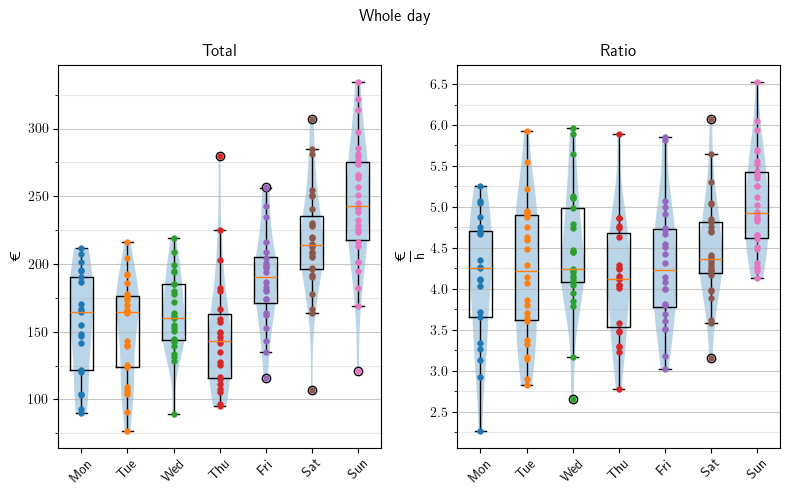

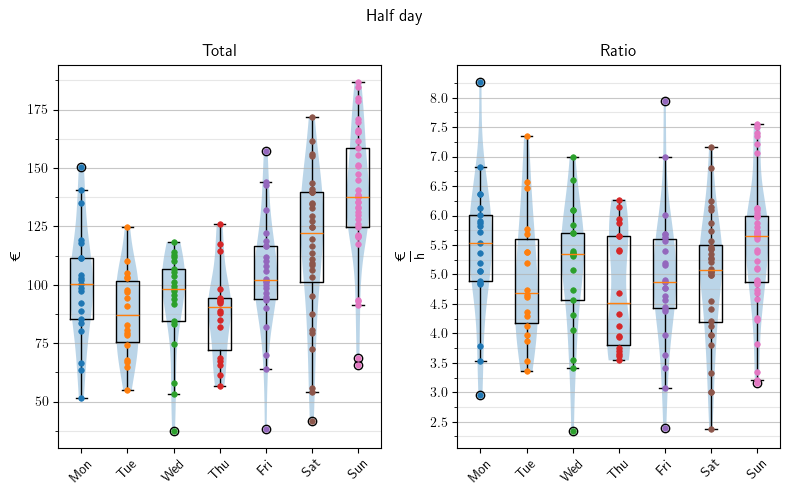

In [197]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

import numpy as np
import os
from datetime import datetime as dt
import calendar
import warnings
import subprocess
import json
from urllib import request
import socket
import matplotlib.pyplot as plt

from harvest_func import abort, git_update, fcalctip, is_connected


warnings.filterwarnings("ignore", category=RuntimeWarning)

plt.rcParams.update({
    "text.usetex": True,
})

L_IGNORE = ['LOG', 'checkpoint', 'DS', 'edited', 'TextIOWrapper']
L_DICT = ['whole', 'half']
L_TORA = ['total', 'ratio']
AX_WEEKDAY = ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
COLOR = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
PATH = './json/'
SP_DAY = 3
LTX_RATIO = '$/ \\frac{\\textup{€}}{\\textup{h}}$'
LTX_EURO = '$/$ €'
L_LTX = [LTX_EURO, LTX_RATIO]

def sorterkey(line):
    year = line[7:11]
    month = line[12:14]
    day = line[15:17]
    time = line[22:27].replace('-', '')
    
    return (int(year), int(month), int(day), int(time))


def ticker(tick, temp):
    minTick = np.floor(np.min(temp) / tick) * tick
    maxTick = np.ceil(np.max(temp) / tick) * tick
    major = np.arange(minTick, maxTick, tick)
    minor = np.arange(minTick, maxTick, tick/2)
    
    return major, minor


def calculate_statistic(files):
    d_return = {
        "date": [],
        "weekday": [],
        "time": [],
        "hour": [],
        "ratio": [],
        "total": [],
        "bar": [],
        "card": [],
        "holiday": [],
    }
    for file in files:
        try:
            f = open(file)
            jData = json.loads(f.read())
        except IndexError:
            print(file)

        s_date, s_time = jData['timestamp'].split('-', 1)
        d_return["date"].append(dt.strptime(s_date, "%d.%m.%Y"))
        d_return["weekday"].append(dt.strptime(s_date, "%d.%m.%Y").weekday())

        if int(s_time[:2]) >= 18:
            d_return["time"].append('PM')
        else:
            d_return["time"].append('AM')

        d_return["hour"].append(jData["hour"])
        
        d_return["ratio"].append(float(jData["ratio"]))

        d_return["total"].append(float(jData["sum"]))

        if jData["bar"]:
            try:
                d_return["bar"].append(float(jData["bar"]))
            except ValueError:
                d_return["bar"].append(False)
        else:
            d_return["bar"].append(False)

        if jData["card"]:
            try:
                d_return["card"].append(float(jData["card"]))
            except:
                d_return["card"].append(False)
        else:
            d_return["card"].append(False)

        d_return["holiday"].append(jData["holiday"])
        
        f.close()

    return d_return


def txtmd(string):
    return string + '  \n'


text = list()

flag = True
files_whole = []
files_half = []

i = 0
for dirpath, dirnames, filenames in os.walk(PATH):
    for f in filenames:
        if not any(s in f for s in L_IGNORE):
            if 'whole' in f.lower():
                files_whole.append(os.path.join(dirpath, f))
            else:
                files_half.append(os.path.join(dirpath, f))
                
            flag = False

files_whole = sorted(files_whole, key=sorterkey)
files_half = sorted(files_half, key=sorterkey)

d_whole = calculate_statistic(files_whole)
d_half = calculate_statistic(files_half)
d_all = [d_whole, d_half]

text.append(txtmd('# Overview'))

text.append(txtmd('|| whole | half |'))
text.append(txtmd('|---|---|---|'))

for theme in ['total', 'ratio', 'bar', 'card']:
    if theme == 'bar':
        keyword = 'cash'
    else:
        keyword = theme

    if keyword == 'ratio':
        keyword += ' ' + LTX_RATIO
    else:
        keyword += ' ' + LTX_EURO
        
    row = '|' + keyword + '|'
    for d in d_all:
        if theme in ['card', 'bar']:
            d_temp = list(filter(lambda item: item != 'None', d[theme]))
        else:
            d_temp = d[theme]

        row += f'{np.mean(d_temp):6.3f} $\\pm$ {np.std(d_temp):6.3f}|'

    text.append(txtmd(row))


text.append(txtmd('# Total / Ratio'))

table_title = ['||total '+LTX_EURO+'|ratio '+LTX_RATIO+'|timestamp|holiday|',
              '||ratio '+LTX_RATIO+'|total '+LTX_EURO+'|timestamp|holiday|']

for i_dict, d in enumerate(d_all):
    text.append(txtmd('## ' +L_DICT[i_dict].capitalize()+ ' day'))
    for i_table, title in enumerate(table_title):    
        text.append(txtmd(title))
        text.append(txtmd('|---|---|---|---|---|'))

        if i_table == 0:
            top = sorted(zip(d["total"], d["ratio"], d["date"], d["time"], d["weekday"], d["holiday"]), reverse=True)[:3]
        else:
            top = sorted(zip(d["ratio"], d["total"], d["date"], d["time"], d["weekday"], d["holiday"]), reverse=True)[:3]
            
        for j in range(3):    
            row = f'|{j+1}"|'
            row += f'{top[j][0]:6.2f}|'
            row += f'{top[j][1]:6.2f}|'
            row += f'{top[j][2].strftime("%d.%m.%Y"):10} {AX_WEEKDAY[top[j][4]][:3]} '
            row += f'{top[j][3]}|'
            row += f'{top[j][5].capitalize()}|'
    
            text.append(txtmd(row))
    
        text.append(txtmd('  \n'))

    plt_weekday = [[[] for _ in range(7)] for _ in range(2)]
    for i, i_total in enumerate(d['total']):
        plt_weekday[0][d['weekday'][i]].append(float(i_total))

    for i, i_ratio in enumerate(d['ratio']):
        plt_weekday[1][d['weekday'][i]].append(float(i_ratio))

    fig, axis = plt.subplots(1, 2, figsize=(8, 5))

    fig.suptitle(L_DICT[i_dict].capitalize()+ ' day')
    for i_ax, ax in enumerate(axis):
        ax.set_title(L_TORA[i_ax].capitalize())
        ax.boxplot(plt_weekday[i_ax])
        plt.sca(ax)
        plt.xticks(range(8), AX_WEEKDAY, rotation=45)
        if i_ax == 0:
            plt.ylabel(r'€')
            if i_dict == 0:
                tick = 50
            else:
                tick = 25
        else:
            plt.ylabel(r'$\displaystyle\frac{\textup{€}}{\textup{h}}$')
            tick = .5
        major, minor = ticker(tick, [item for row in plt_weekday[i_ax] for item in row])
        plt.grid(axis = 'y', which = 'major', alpha = 0.7)
        plt.grid(axis = 'y', which = 'minor', alpha = 0.3)
        ax.set_yticks(major)
        ax.set_yticks(minor, minor = True)
        for i in range(7):
            ax.plot(np.ones(len(plt_weekday[i_ax][i])) *i +1, plt_weekday[i_ax][i], ms=4, marker='o', mew=0.5, ls="none", color=COLOR[i])
        ax.violinplot(plt_weekday[i_ax], positions=range(1, 8), showextrema=False)

    fig.tight_layout()

    png_name = './png/total_ratio_'+L_DICT[i_dict]+'.png'
    plt.savefig(png_name, dpi=300)
    text.append(txtmd('  '))
    text.append(txtmd('![Image](' + png_name + ')'))

    
text.append(txtmd('# Weekday'))
text.append(txtmd('|||whole|half|'))
text.append(txtmd('|---|---|---|---|'))
for i in range(7):
    row = f'|{calendar.day_name[i]}|'
    for i_key, key in enumerate(L_TORA):
        row += f'{key} {L_LTX[i_key]}|'
        for i_dict, d in enumerate(d_all):
            mask = [n == i for n in d['weekday']]
            
            row += f'{np.mean(np.array(d[key])[mask]):6.2f}'
            row += f' $\\pm$'
            row += f'{np.std(np.array(d[key])[mask]):6.2f}|'
    
        text.append(txtmd(row))
        row = '||'


text.append(txtmd('# Make me feel Special'))
for i_dict, d in enumerate(d_all):
    plt_set = []

    text.append(txtmd('## ' +L_DICT[i_dict].capitalize()+ ' day'))

    fig, axs = plt.subplots(1, 2, figsize=(8, 5))
    fig.suptitle(L_DICT[i_dict].capitalize()+ ' day')
    every = [[] for _ in range(2)]
    normal = [[] for _ in range(2)]
    weekend = [[] for _ in range(2)]
    holiday = [[] for _ in range(2)]
    special = [[] for _ in range(2)]
    special_f = [[] for _ in range(2)]

    axs_descr = ['All',
                'Normal',
                'Weekend',
                'Holiday',
                'Special',
                'Special\&Friday']


    for i_key, key in enumerate(L_TORA):
        every[i_key] = d[key]

        for i, i_day in enumerate(d['weekday']):
            if 4 < i_day < 7:
                weekend[i_key].append(d[key][i])
            else:
                normal[i_key].append(d[key][i])

        mask_h = [i.lower() not in ['false', 'offline'] for i in d['holiday']]
        holiday[i_key] = np.array(d[key])[mask_h]

        mask_sp = [4 < i < 7 for i in d['weekday']]
        mask_sp = [h or sp for h, sp in zip(mask_h, mask_sp)]
        special[i_key] = np.array(d[key])[mask_sp]

        mask_sp = [3 < i < 7 for i in d['weekday']]
        mask_sp = [h or sp for h, sp in zip(mask_h, mask_sp)]
        special_f[i_key] = np.array(d[key])[mask_sp]

        plt_special = [every[i_key],
                       normal[i_key],
                       weekend[i_key],
                       holiday[i_key],
                       special[i_key],
                       special_f[i_key]]
        
        plt_set.append(plt_special)

        axs[i_key].set_title(key.capitalize())
        axs[i_key].boxplot(plt_special)
        plt.sca(axs[i_key])
        plt.xticks(range(7), [''] + axs_descr, rotation=45)
        if i_key == 0:
            plt.ylabel(r'€')
            if i_dict == 0:
                tick = 50
            else:
                tick = 25
        else:
            plt.ylabel(r'$\displaystyle\frac{\textup{€}}{\textup{h}}$')
            tick = .5
        major, minor = ticker(tick, [item for row in plt_special for item in row])
        plt.grid(axis = 'y', which = 'major', alpha = 0.7)
        plt.grid(axis = 'y', which = 'minor', alpha = 0.3)
        axs[i_key].set_yticks(major)
        axs[i_key].set_yticks(minor, minor = True)
        for i in range(6):
            axs[i_key].plot(np.ones(len(plt_special[i])) *i +1, plt_special[i], ms=4, marker='o', mew=0.5, ls="none", color=COLOR[i])
        axs[i_key].violinplot(plt_special, positions=range(1, 7), showextrema=False)

    text.append(txtmd('||total'+LTX_EURO+'|ratio'+LTX_RATIO+'|count|'))
    text.append(txtmd('|---|---|---|---|'))
    
    for i in range(len(plt_special)):
        row = '|' + axs_descr[i] + '|'
        for j in range(2):
            row += f'{np.mean(plt_set[j][i]):6.2f}'
            row += f' $\\pm$'
            row += f'{np.std(plt_set[j][i]):6.2f}|'

        row += f'{len(plt_special[i])}'
        text.append(txtmd(row))

    fig.tight_layout()
    
    png_name = './png/special_'+L_DICT[i_dict]+'.png'
    plt.savefig(png_name, dpi=300)
    text.append(txtmd('  '))
    text.append(txtmd('![Image](' + png_name + ')'))


text.append(txtmd('# Frequency'))

weekday = np.zeros(7)
for i_dict, d in enumerate(d_all):
    for day in d['weekday']:
        weekday[day] += 1

def piechart_pct(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

wp = {'linewidth': 1, 'edgecolor': "green"}

colors = COLOR

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(weekday,
                                  autopct=lambda pct: piechart_pct(pct, weekday),
                                  labels=AX_WEEKDAY[1:],
                                  colors=colors,
                                  startangle=90,
                                  textprops=dict(color="black"))

ax.set_title("Frequency")

fig.tight_layout()

png_name = './png/frequency.png'
plt.savefig(png_name, dpi=300)
text.append(txtmd('  '))
text.append(txtmd('![Image](' + png_name + ')'))

with open('./README.md', 'w') as f:
    f.writelines(text)

with open('./README.md', 'r') as f:
    content = f.read()

display(Markdown(content))

In [201]:
count = np.zeros(3)
path_whole = []
path_half = []

root_dir = './json/'
for root, dirs, files in os.walk(root_dir, onerror=None):
    for filename in files:
        if not any(s in filename for s in ['LOG', 'checkpoint', 'DS', 'edited']):
            file_path = os.path.join(root, filename)

            if 'WHOLE' in file_path:
                count[0] += 1
                path_whole.append(file_path)
            elif 'HALF' in file_path:
                count[1] += 1
                path_half.append(file_path)
            else:
                print(file_path)
                count[2] += 1

print(count)

./json/2024/09/16-Mon-13-00.json
./json/2024/08/28-Wed-19-00.json
./json/2024/08/28-Wed-13-30.json
[176. 174.   3.]


In [156]:
path_all = path_whole + path_half
for i_target, target in enumerate(path_all):
    hit = [target]
    for prehit in path_all[i_target + 1:]:
        if target.rsplit('-', 3)[0] == prehit.rsplit('-', 3)[0]:
            hit.append(prehit)

    for part in hit:
        if 'WHOLE' in part:
            part_whole = part
        elif int(part.rsplit('-', 3)[1]) >= 18:
            part_pm = part
        else:
            part_am = part
    # f = open(p)
    # j_data = json.loads(f.read())
    break

13
18


# Frequency  
    
![Image](./png/frequency.png)  


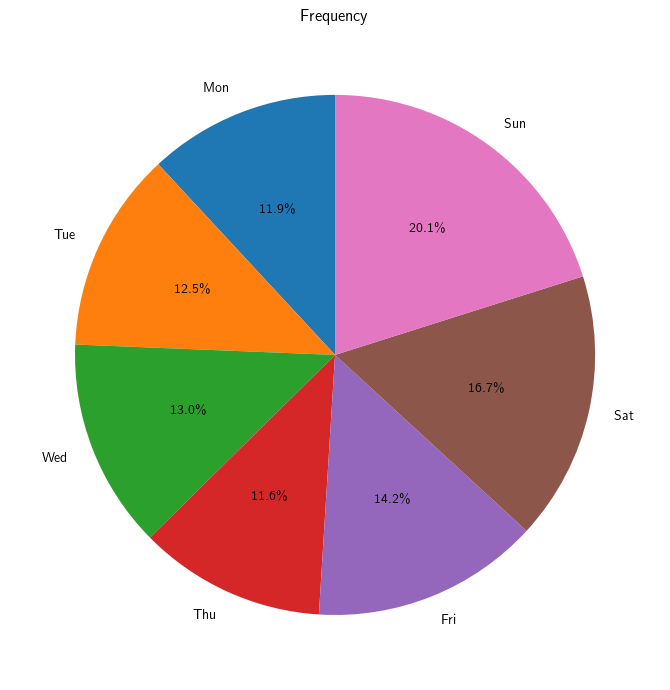

In [131]:
text = list()

text.append(txtmd('# Frequency'))

weekday = np.zeros(7)
for i_dict, d in enumerate(d_all):
    for day in d['weekday']:
        weekday[day] += 1

def piechart_pct(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

wp = {'linewidth': 1, 'edgecolor': "green"}

colors = COLOR

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(weekday,
                                  autopct=lambda pct: piechart_pct(pct, weekday),
                                  labels=AX_WEEKDAY[1:],
                                  colors=colors,
                                  startangle=90,
                                  textprops=dict(color="black"))

ax.set_title("Frequency")

fig.tight_layout()

png_name = './png/frequency.png'
plt.savefig(png_name, dpi=300)
text.append(txtmd('  '))
text.append(txtmd('![Image](' + png_name + ')'))

with open('./test.md', 'w') as f:
    f.writelines(text)

with open('./test.md', 'r') as f:
    content = f.read()

display(Markdown(content))


In [197]:
'a.b.c'.rsplit('.', 1)

['a.b', 'c']